In [50]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,accuracy_score,average_precision_score,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Exploratory Data Analysis

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### Data Conversion

In [5]:
le = LabelEncoder()
company_data['ShelveLoc'] = le.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = le.fit_transform(company_data['Urban'])
company_data['US'] = le.fit_transform(company_data['US'])
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [7]:
company_data.isna().sum() # no null values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
company_data[company_data.duplicated()].shape # no duplicate values

(0, 11)

### Outlier Detection

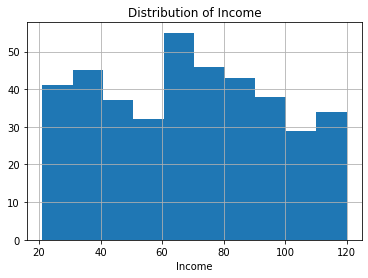

In [12]:
plt.title('Distribution of Income')
plt.xlabel('Income')
company_data['Income'].hist()
plt.show()

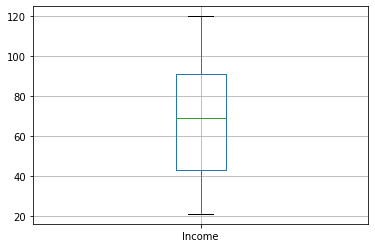

In [13]:
company_data.boxplot(column= ['Income']) # no outliers 
plt.show()

In [14]:
company_data.describe().round(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,7.50,124.98,68.66,6.64,264.84,115.80,1.31,53.32,13.90,0.70,0.64
std,2.82,15.33,27.99,6.65,147.38,23.68,0.83,16.20,2.62,0.46,0.48
min,0.00,77.00,21.00,0.00,10.00,24.00,0.00,25.00,10.00,0.00,0.00
25%,5.39,115.00,42.75,0.00,139.00,100.00,1.00,39.75,12.00,0.00,0.00
50%,7.49,125.00,69.00,5.00,272.00,117.00,2.00,54.50,14.00,1.00,1.00
75%,9.32,135.00,91.00,12.00,398.50,131.00,2.00,66.00,16.00,1.00,1.00
max,16.27,175.00,120.00,29.00,509.00,191.00,2.00,80.00,18.00,1.00,1.00


### Scatter plot and Correlation analysis

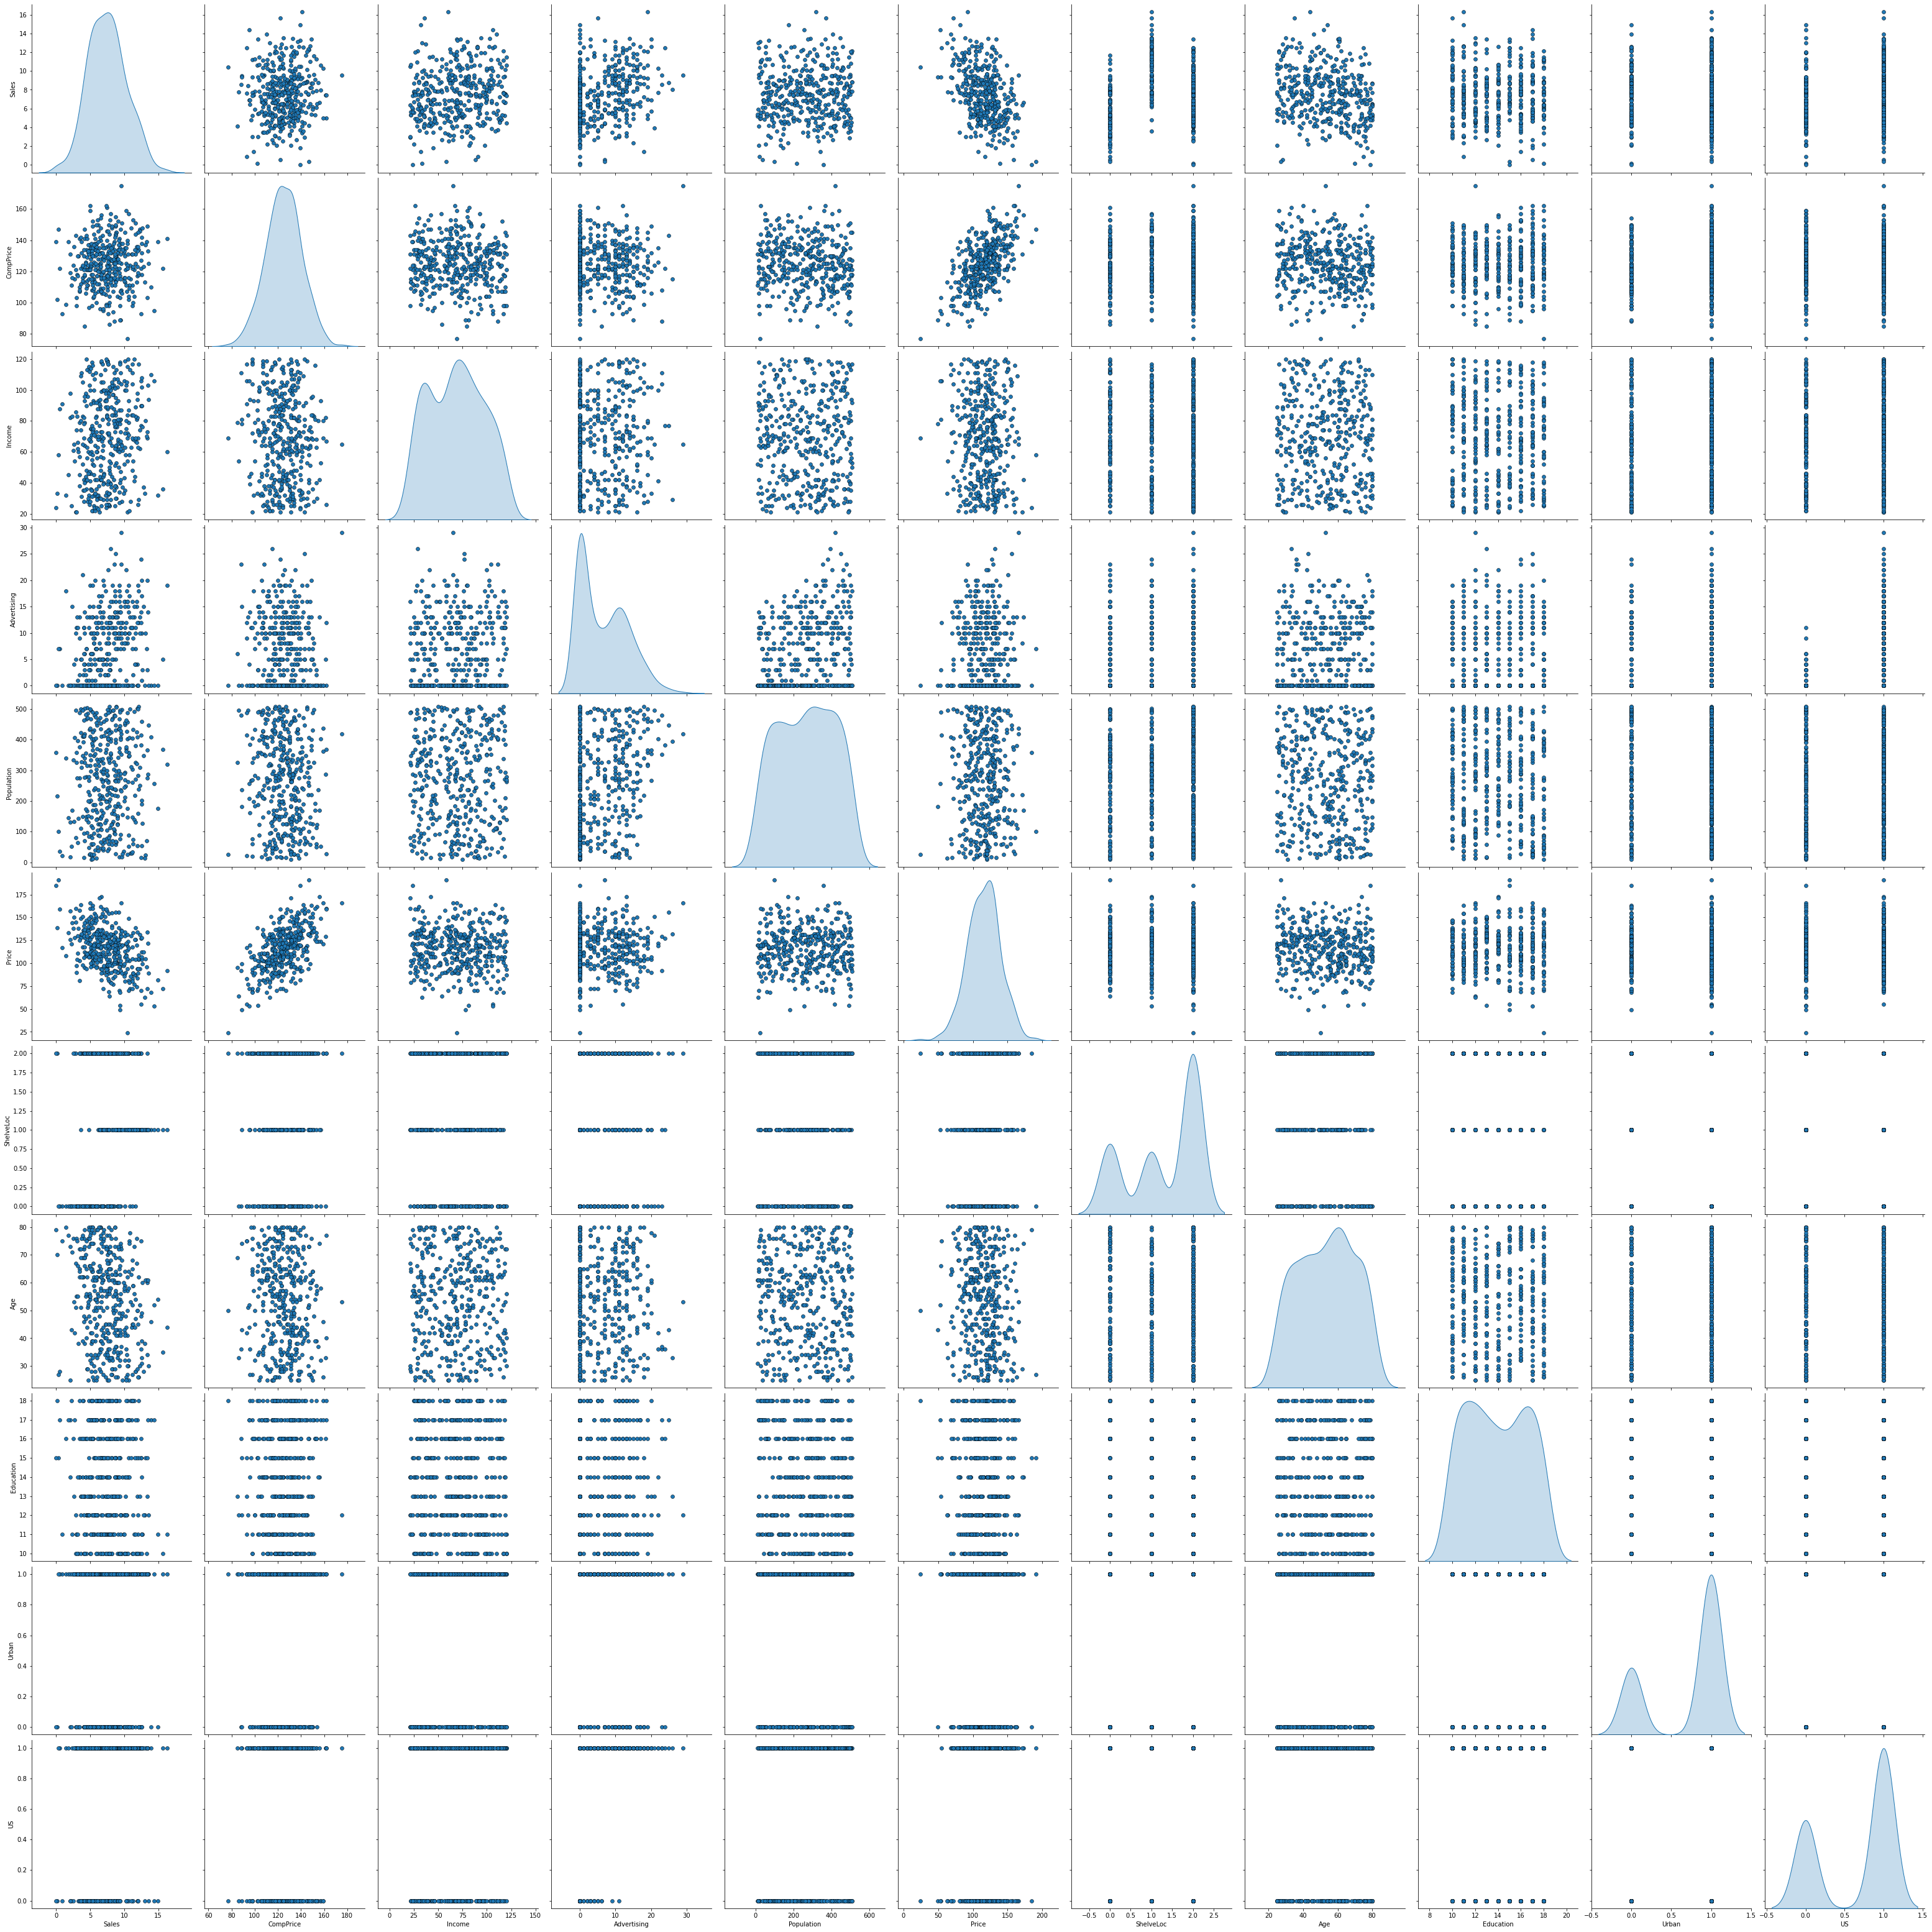

In [21]:
sns.pairplot(company_data,diag_kind = 'kde',plot_kws = {'edgecolor': 'k'}, size = 4)
plt.show()

In [23]:
data_corr = company_data.corr().round(2)
data_corr

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.00,0.06,0.15,0.27,0.05,-0.44,0.16,-0.23,-0.05,-0.02,0.18
CompPrice,0.06,1.00,-0.08,-0.02,-0.09,0.58,0.02,-0.10,0.03,0.07,0.02
Income,0.15,-0.08,1.00,0.06,-0.01,-0.06,-0.07,-0.00,-0.06,0.04,0.09
Advertising,0.27,-0.02,0.06,1.00,0.27,0.04,0.01,-0.00,-0.03,0.04,0.68
Population,0.05,-0.09,-0.01,0.27,1.00,-0.01,-0.04,-0.04,-0.11,-0.05,0.06
Price,-0.44,0.58,-0.06,0.04,-0.01,1.00,0.01,-0.10,0.01,0.05,0.06
ShelveLoc,0.16,0.02,-0.07,0.01,-0.04,0.01,1.00,0.06,0.00,-0.06,-0.04
Age,-0.23,-0.10,-0.00,-0.00,-0.04,-0.10,0.06,1.00,0.01,0.03,0.01
Education,-0.05,0.03,-0.06,-0.03,-0.11,0.01,0.00,0.01,1.00,-0.03,-0.08
Urban,-0.02,0.07,0.04,0.04,-0.05,0.05,-0.06,0.03,-0.03,1.00,0.05


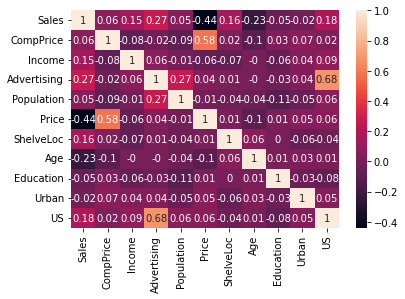

<Figure size 720x720 with 0 Axes>

In [25]:
sns.heatmap(data_corr,annot = True)
plt.figure(figsize=(10,10))
plt.show()

## Transformation of Data

### Creating dummy

In [28]:
company_data = pd.get_dummies(company_data,columns=['Urban','US'], drop_first=True)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_1,US_1
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


### Normalization of Data

In [29]:
list(company_data.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_1',
 'US_1']

In [30]:
min_max = MinMaxScaler()
scaled_data = min_max.fit_transform(company_data)
new_data = pd.DataFrame(scaled_data,columns= {'Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_1','US_1'}).round(2)
new_data

,Price,Age,CompPrice,Education,Income,Sales,ShelveLoc,Advertising,US_1,Population,Urban_1
0,0.58,0.62,0.53,0.38,0.53,0.57,0.0,0.31,0.88,1.0,1.0
1,0.69,0.35,0.27,0.55,0.50,0.35,0.5,0.73,0.00,1.0,1.0
2,0.62,0.37,0.14,0.34,0.52,0.34,1.0,0.62,0.25,1.0,1.0
3,0.45,0.41,0.80,0.14,0.91,0.44,1.0,0.55,0.50,1.0,1.0
4,0.26,0.65,0.43,0.10,0.66,0.62,0.0,0.24,0.38,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.77,0.62,0.88,0.59,0.39,0.62,0.5,0.15,0.50,1.0,1.0
396,0.38,0.63,0.02,0.10,0.05,0.57,1.0,0.55,0.12,0.0,1.0
397,0.46,0.87,0.05,0.41,0.72,0.81,1.0,0.27,1.00,1.0,1.0
398,0.37,0.23,0.59,0.24,0.55,0.43,0.0,0.45,0.25,1.0,1.0


## Model Building and Model Training

In [31]:
x = company_data.drop('Income',axis = 1)
y = company_data[['Income']]

In [32]:
x.shape,y.shape

((400, 10), (400, 1))

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state= 13)

In [34]:
x_train.shape,y_train.shape

((320, 10), (320, 1))

In [35]:
x_test.shape,y_test.shape

((80, 10), (80, 1))

## Decision Tree with gini

In [36]:
dt_tree = DecisionTreeClassifier(criterion='gini',max_depth = 3)
dt_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Random Forest 

In [51]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

## Model Testing

## 1. Decision Tree

In [38]:
y_pred_train = dt_tree.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.06875

In [40]:
y_pred_test = dt_tree.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.0125

In [41]:
list(x.columns)

['Sales',
 'CompPrice',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_1',
 'US_1']

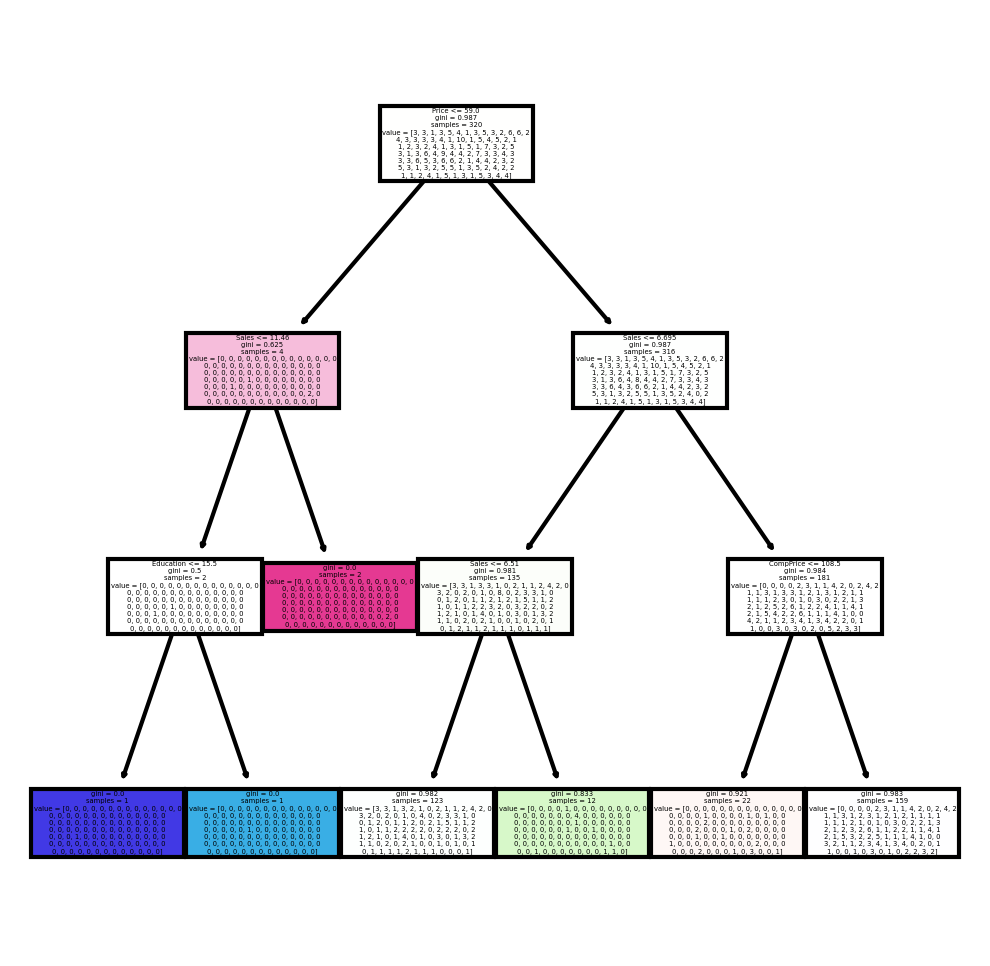

In [46]:
fn=['Sales','CompPrice','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_1','US_1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dt_tree,feature_names = fn,filled = True);

## 2. Random Forest

In [52]:
y_pred_train = rf_model.predict(x_train)
accuracy_score(y_train,y_pred_train)

1.0

In [53]:
y_pred_test = rf_model.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.025

#### In order to overcome the problem of overfitting we should apply boosting to the same. 

In [54]:
adb_classifier = AdaBoostClassifier(n_estimators=100)
gb_classifier  = GradientBoostingClassifier(n_estimators=100)
xgb_classifier = XGBClassifier(n_estimators=100)
lgb_classifier = LGBMClassifier(n_estimators=100)

In [57]:
adb_classifier.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [58]:
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
lgb_classifier.fit(x_train,y_train)

LGBMClassifier()

In [62]:
y_pred_rf  = rf_model.predict(x_test)
y_pred_adb = adb_classifier.predict(x_test)
y_pred_gb  = gb_classifier.predict(x_test)
y_pred_lgb = lgb_classifier.predict(x_test)

In [63]:
print('Accuracy Score of RF : ',accuracy_score(y_test,y_pred_rf))
print('Accuracy Score of ADB: ',accuracy_score(y_test,y_pred_adb))
print('Accuracy Score of GB : ',accuracy_score(y_test,y_pred_gb))
print('Accuracy Score of LGB: ',accuracy_score(y_test,y_pred_lgb))

Accuracy Score of RF :  0.025
Accuracy Score of ADB:  0.0
Accuracy Score of GB :  0.025
Accuracy Score of LGB:  0.0125


## ============================== THE END ==============================